# Vector Fields

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import createpilabels as labels
import pendulum

In [108]:
L_1: float = 1
theta_0_1: float = np.pi/3
omega_0_1: float = 0
mu_1: float = 0.5
G = 9.8

In [109]:
p = pendulum.Pendulum(L=1, theta_0=np.pi/3, omega_0=0, mu=0.5)
p.update_theta(T=100, step=0.01)

trace_path = p.get_trace_path()

In [110]:
X, Y = np.meshgrid(np.arange(-2 * np.pi, 2 * np.pi, .2), np.arange(-5, 5, .2))

U = Y
V = (-mu_1 * Y) - ((G/L_1) * np.sin(X))

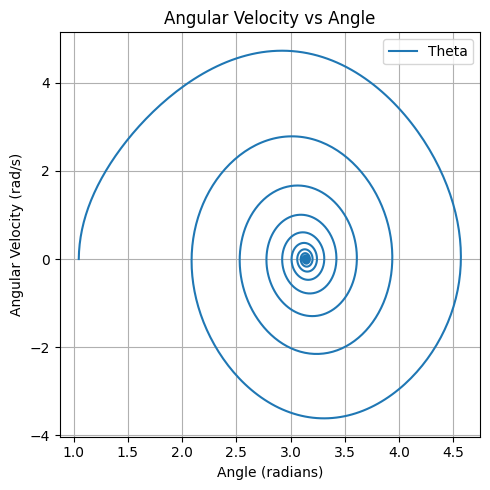

In [111]:
plt.figure(figsize=(5, 5))
plt.plot(trace_path[:, 0], trace_path[:, 1], label='Theta')
plt.title('Angular Velocity vs Angle')
plt.xlabel('Angle (radians)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

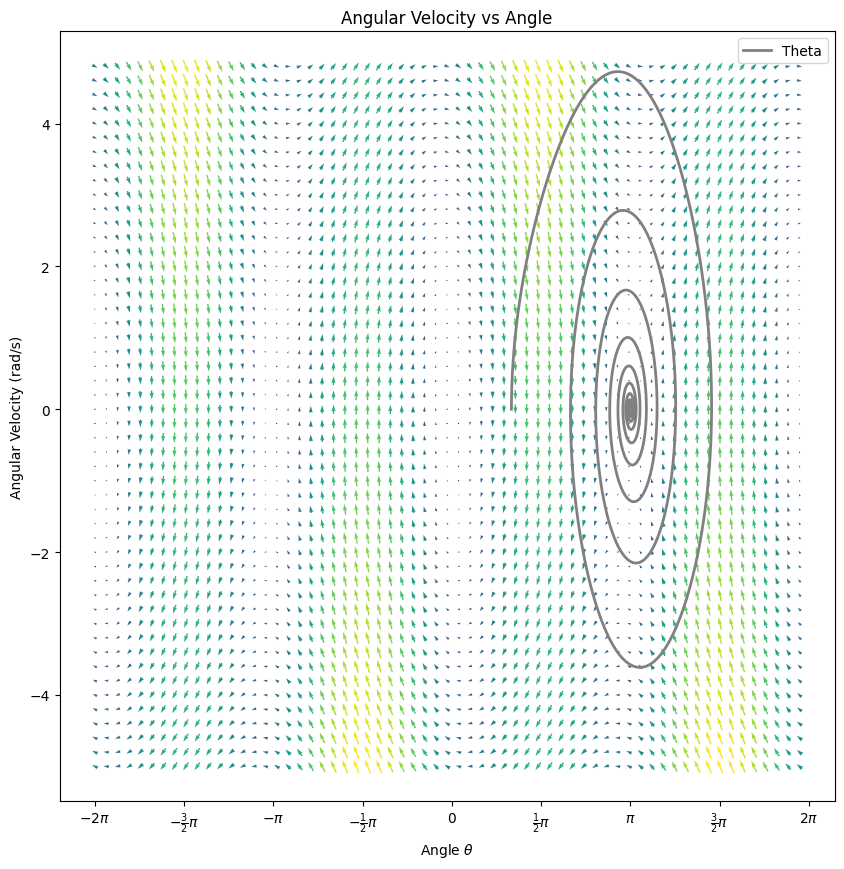

In [104]:
fig, ax = plt.subplots(ncols=1, figsize=(10,10))

ax.set_xlabel(r"Angle $\theta$")
ax.set_ylabel('Angular Velocity (rad/s)')
labels.create_pi_labels(-2, 2, 1/2, ax, 'x')

ax.set_title('Angular Velocity vs Angle')
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M, units='xy', pivot='mid', width=0.022,
               scale=None, cmap = 'viridis')

ax.plot(trace_path[:, 0], trace_path[:, 1], label='Theta', color='grey', linewidth=2)
ax.legend()